Populating the interactive namespace from numpy and matplotlib
ep= 2.75
-3.125417
ep= 6.5
-3.125417


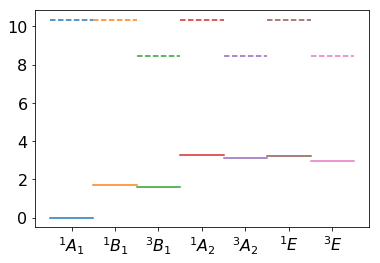

In [4]:
%pylab inline

import math
import numpy as np
from scipy.sparse.linalg import inv
#from numpy.linalg import inv
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
from scipy import interpolate
sys.path.append('../../src/')
from pylab import *

import parameters as pam
import lattice as lat
import variational_space as vs
import hamiltonian as ham
import basis_change as basis
import lanczos

ed = 0
eps = np.arange(2.75, 2.751, 1.0) #[3.5]#,3.5,4.5]
As = np.arange(6.5, 6.51, 0.1)
B = 0.15
C = 0.58
#As = np.arange(100, 100.1, 1.0)
#B = 0
#C = 0

Norb = 7
tpp = 0.55
tpd = 1.5

Upp = 0
Mc = 20
eta = 0.02
symmetries =['1A1','1B1','3B1','1A2','3A2','1E','3E']
symlabels = ['$^{1}A_1$','$^{1}B_1$','$^{3}B_1$','$^{1}A_2$','$^{3}A_2$','$^{1}E$','$^{3}E$']

Ms = ['-b','-r','-g','-m','-c','-k','-y','--b','--r','--g','--m','--c','--k','--y',\
      '-.b','-.r','-.g','-.m','-.c','-.k','-.y',':b',':r',':g',':m',':c',':k',':y']
Ms = plt.rcParams['axes.prop_cycle'].by_key()['color']

mode = '_vs_sym' # '_vs_tpd'
offset = 1

if Norb<=8:
    fname = 'ep'+str(eps[0])+'_tpd'+str(tpd)+'_tpp'+str(tpp)+'_Upp'+str(Upp)+'_Mc'+str(Mc) \
     +'_Norb'+str(Norb)+'_eta'+str(eta)
else:
    fname = 'ep'+str(eps[0])+'_pdp'+str(pdp)+'_pps'+str(pps)+'_ppp'+str(ppp)+'_Upp'+str(Upp)+'_Mc'+str(Mc) \
     +'_Norb'+str(Norb)+'_eta'+str(eta)
#a = loadtxt('./data_Aw/'+fname+'_cont_bottom.txt',skiprows=0)
#x = [a, a]
#y = [0, 5]

#############################################################################
Nsym = len(symmetries)

if mode=='_vs_sym':
    for ep in eps:
        print 'ep=',str(ep)
        for A in As:
            Udd = A+4*B+3*C
            
            # readin two-hole ground state energy
            fname = 'Egs_Norb'+str(Norb)+'_tpp'+str(tpp)+'_B'+str(B)+'_C'+str(C)+'_Upp0_Mc'+str(Mc)+'_eta'+str(eta)
            a = loadtxt('../twohole_impurity_model/data_GS/'+fname+'.txt',skiprows=0)
            E0 = a[1,3]
            print E0
            
            # readin two-hole actual GS energy and atomic energy
            fname = 'Norb'+str(Norb)+'_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C) \
                +'_Upp0_Mc'+str(Mc)+'_eta'+str(eta)+'_ep'+str(ep)

            a = loadtxt('./data_atomic_actual_GS/'+fname+'.txt',skiprows=0)
            
            for i in range(0,Nsym):
                xx = [i,i+1]
                yy1 = [a[1,i]-E0, a[1,i]-E0]
                yyatomic = [a[0,i]-E0, a[0,i]-E0]
                
                sym = symmetries[i]
                plot(xx, yy1, color=Ms[i], linewidth=1.5)
                plot(xx, yyatomic, '--', color=Ms[i], linewidth=1.5)#, label=symlabels[i])
                
########
# the case that 3B1 is GS
eps = np.arange(6.5, 6.51, 1.0) #[3.5]#,3.5,4.5]
As = np.arange(2.5, 2.51, 0.1)
B = 0.15
C = 0.58
#As = np.arange(100, 100.1, 1.0)
#B = 0
#C = 0

Norb = 7
tpp = 0.55
tpd = 1.5

Upp = 0
Mc = 20
eta = 0.02
symmetries =['1A1','1B1','3B1','1A2','3A2','1E','3E']
symlabels = ['$^{1}A_1$','$^{1}B_1$','$^{3}B_1$','$^{1}A_2$','$^{3}A_2$','$^{1}E$','$^{3}E$']

Ms = ['-b','-r','-g','-m','-c','-k','-y','--b','--r','--g','--m','--c','--k','--y',\
      '-.b','-.r','-.g','-.m','-.c','-.k','-.y',':b',':r',':g',':m',':c',':k',':y']
Ms = plt.rcParams['axes.prop_cycle'].by_key()['color']

mode = '_vs_sym' # '_vs_tpd'
offset = 1

if Norb<=8:
    fname = 'ep'+str(eps[0])+'_tpd'+str(tpd)+'_tpp'+str(tpp)+'_Upp'+str(Upp)+'_Mc'+str(Mc) \
     +'_Norb'+str(Norb)+'_eta'+str(eta)
else:
    fname = 'ep'+str(eps[0])+'_pdp'+str(pdp)+'_pps'+str(pps)+'_ppp'+str(ppp)+'_Upp'+str(Upp)+'_Mc'+str(Mc) \
     +'_Norb'+str(Norb)+'_eta'+str(eta)
#a = loadtxt('./data_Aw/'+fname+'_cont_bottom.txt',skiprows=0)
#x = [a, a]
#y = [0, 5]

#############################################################################
Nsym = len(symmetries)

if mode=='_vs_sym':
    for ep in eps:
        print 'ep=',str(ep)
        for A in As:
            Udd = A+4*B+3*C
            
            # readin two-hole ground state energy
            fname = 'Egs_Norb'+str(Norb)+'_tpp'+str(tpp)+'_B'+str(B)+'_C'+str(C)+'_Upp0_Mc'+str(Mc)+'_eta'+str(eta)
            a = loadtxt('../twohole_impurity_model/data_GS/'+fname+'.txt',skiprows=0)
            E0 = a[1,3]
            print E0
            
            # readin two-hole actual GS energy and atomic energy
            fname = 'Norb'+str(Norb)+'_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C) \
                +'_Upp0_Mc'+str(Mc)+'_eta'+str(eta)+'_ep'+str(ep)

            a = loadtxt('./data_atomic_actual_GS/'+fname+'.txt',skiprows=0)
            
            for i in range(0,Nsym):
                xx = [i,i+1]
                yy1 = [a[1,i]-E0, a[1,i]-E0]
                yyatomic = [a[0,i]-E0, a[0,i]-E0]
                
                sym = symmetries[i]
                #plot(xx, yy1, color=Ms[i], linewidth=1.5)
                #plot(xx, yyatomic, '-.', color=Ms[i], linewidth=1.5)#, label=symlabels[i])
        
#xlim([-5,1])
#xlim([0,15])
#if maxval>20:
#    ylim([0,20])
#else:
#    ylim([0,maxval])
#ylim([0,7*offset])
#xlabel('$\omega$',fontsize=21)
#ylabel('$A_{d^8}(\omega)$',fontsize=19)
#text(0.4, 6.5, '(d)', fontsize=20)
#grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=15, framealpha=1.0, edgecolor='black')
xticks(fontsize=16) 
yticks(fontsize=16) 
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], symlabels)

savefig("Compare_lowestenergy_atomic_actual.pdf")